# MULTIVARIATE LINEAR REGRESSION

The following notebook is my code for my multi-dimensional linear regression of the concrete data. First, I imported all necessary packages.

In [246]:
# importing pandas
import pandas as pd
#importing numpy
import numpy as np
#importing matplotlib
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sb
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

This is to confirm the data is in the correct directory.

In [247]:
from os.path import exists
data_dir = 'data'
#data_dir = 'Documents/Users/kobo/514-assignment-1/data'
assert exists(f'{data_dir}/Concrete_Data.csv'), 'concrete data file is missing.'
data = pd.read_csv(f'{data_dir}/Concrete_Data.csv')

The following reads the data file and prints out all the feature attributes in the dataset.

In [248]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

The following cell replaces any values that are missing or nan with the mean of that feature. 

In [249]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer = imputer.fit(data.iloc[:, 1:])
data.iloc[:, 1:] = imputer.transform(data.iloc[:, 1:])

The following cell separates the dataset into its input features (X) and its output feature (Y). In addition, I standardized all features by subtracting each feature's value from the feature's mean and then dividing that by the feature's standard deviation.

In [250]:
X=data[['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']]
Y=data['Concrete compressive strength(MPa, megapascals) ']
py=np.array((Y-Y.mean())/Y.std())
pX=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

The following cell shows the standardization of my feature values. 

In [281]:
pX

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069
...,...,...,...,...,...,...,...,...
1025,-0.045623,0.487998,0.564271,-0.092126,0.451190,-1.322363,-0.065861,-0.279597
1026,0.392628,-0.856472,0.959602,0.675872,0.702285,-1.993711,0.496651,-0.279597
1027,-1.269472,0.759210,0.850222,0.521336,-0.017520,-1.035561,0.080068,-0.279597
1028,-1.168042,1.307430,-0.846733,-0.279443,0.852942,0.214537,0.191074,-0.279597


The following cells splits the dataset into its training and testing sets for BOTH the processed and raw data. This way we can compare the two later on.

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.126, random_state=4)

In [253]:
pX_train, pX_test, py_train, py_test = train_test_split(pX, py, test_size=0.126, random_state=4)

In [254]:
X_test

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
522,284.0,15.0,141.0,179.0,5.5,842.0,801.0,56.0
701,288.0,192.0,0.0,192.0,0.0,932.0,717.8,90.0
563,210.7,316.1,0.0,185.7,0.0,977.0,689.3,7.0
678,288.0,192.0,0.0,192.0,0.0,932.0,717.8,28.0
98,475.0,118.8,0.0,181.1,8.9,852.1,781.5,7.0
...,...,...,...,...,...,...,...,...
157,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56.0
910,144.0,136.0,106.0,178.0,7.0,941.0,774.0,28.0
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7.0
170,388.6,97.1,0.0,157.9,12.1,852.1,925.7,91.0


The following cells define the cost function and gradient descent. For the cost function, I implemented the mean squared error, or MSE. The gradient descent utilizes the derivative of the loss function and continuously updates theta until it is minimized. 

In [255]:
def cost_function(X, y, theta):
    m = len(y)
    error = np.dot(X, theta.T) - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error

In [256]:
def gradient_descent(X, y, theta, alpha, iters):
    cost_array = np.zeros(iters)
    m = y.size
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array

Here, we initialize the thetas to zero before we run the gradient descent. Then we determine the cost function for each of the data splits. 

In [257]:
pX_train_theta = np.zeros(pX_train.shape[1])
pX_test_theta = np.zeros(pX_test.shape[1])
X_train_theta = np.zeros(X_train.shape[1])
X_test_theta = np.zeros(X_test.shape[1])
pX_train_initial_cost, _ = cost_function(pX_train, py_train, pX_train_theta)
pX_test_initial_cost, _ = cost_function(pX_test, py_test, pX_test_theta)
X_train_initial_cost, _ = cost_function(X_train, y_train, X_train_theta)
X_test_initial_cost, _ = cost_function(X_test, y_test, X_test_theta)

In [258]:
pX_train_theta, pX_train_cost_num = gradient_descent(pX_train, py_train, pX_train_theta, 0.001, 1000)
pX_test_theta, pX_test_cost_num = gradient_descent(pX_test, py_test, pX_test_theta, 0.001, 1000)
X_train_theta, X_train_cost_num = gradient_descent(X_train, y_train, X_train_theta, 0.000001, 10000)
X_test_theta, X_test_cost_num = gradient_descent(X_test, y_test, X_test_theta, 0.000001, 10000)

In [266]:
def plotchart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Number of Iterations ')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    #plt.style.use('fivethirtyeight')
    plt.show()

The following cell is to use sklearn's LinearRegression package to CHECK if our gradient descent implementation is somewhat accurate/close to what sklearn predicts. **IMPORTANT** I only used this as a method of checking, not part of my actual code!

In [267]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_test, y_test)
lin_reg.intercept_, lin_reg.coef_

(-65.4484530512874,
 array([ 0.12231459,  0.10466751,  0.09159276, -0.04316247,  0.60695679,
         0.03660629,  0.02136743,  0.10978654]))

The following cells plot the decrease in error cost over number of iterations for each of the test splits. The final theta values are also printed out along with the cost error

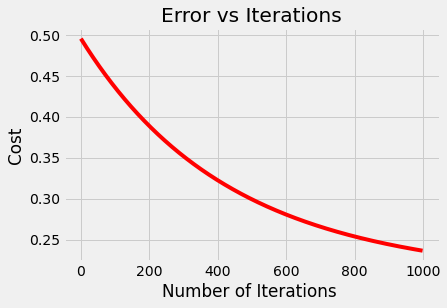

The processed trained data split with final theta values of [ 0.28571352  0.09663541 -0.03699824 -0.18252392  0.19513469 -0.08524329
 -0.11162747  0.22204861], cost error is 0.23631286938841495


In [271]:
plotchart(1000, pX_train_cost_num)
pX_train_final_cost, _ = cost_function(pX_train, py_train, pX_train_theta)
print('The processed trained data split with final theta values of {0}, cost error is {1}'.format(pX_train_theta, pX_train_final_cost))

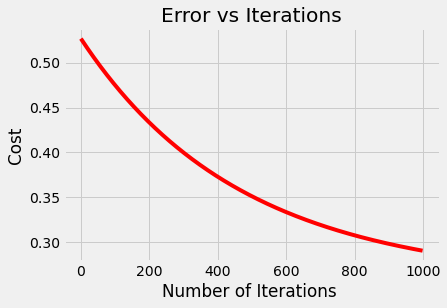

The processed test data split with final theta values of [ 0.25371773  0.09901771 -0.06030999 -0.15521937  0.19791877 -0.03384726
 -0.10563275  0.2497841 ], cost error is 0.29017386329235945


In [272]:
plotchart(1000, pX_test_cost_num)
pX_test_final_cost, _ = cost_function(pX_test, py_test, pX_test_theta)
print('The processed test data split with final theta values of {0}, cost error is {1}'.format(pX_test_theta, pX_test_final_cost))

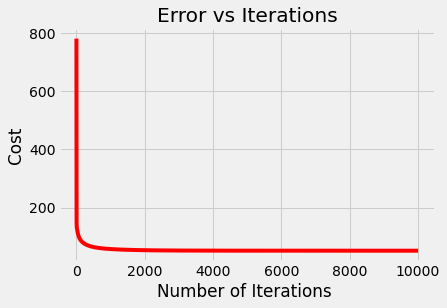

The raw trained data split with final theta values of [ 0.11972244  0.10440738  0.09109665 -0.20910275  0.05896257  0.00970864
  0.01628735  0.11530254], cost error is 51.49537388236182


In [274]:
plotchart(10000, X_train_cost_num)
X_train_final_cost, _ = cost_function(X_train, y_train, X_train_theta)
print('The raw trained data split with final theta values of {0}, cost error is {1}'.format(X_train_theta, X_train_final_cost))

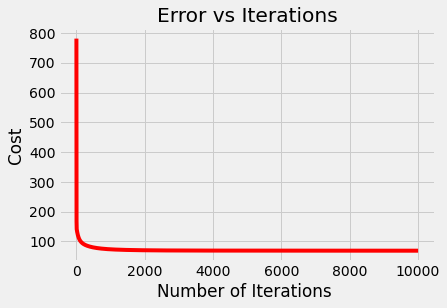

The raw test data split with final theta values of [ 0.11710274  0.09749562  0.09089622 -0.16804224  0.09514741  0.00844487
  0.00780208  0.1112131 ], cost error is 68.81555273266352


In [275]:
plotchart(10000, X_test_cost_num)
X_test_final_cost, _ = cost_function(X_test, y_test, X_test_theta)
print('The raw test data split with final theta values of {0}, cost error is {1}'.format(X_test_theta, X_test_final_cost))

The following cell are predictions of the concrete compressive strength using the final theta values. Final predictions are in their standardized form for the standardized splits. The printed out values are in the order of (processed trained split, processed test split, raw train split, raw test split)

In [282]:
predict1 = np.array([2.476712, -.856472, -0.846733, -0.916319, -0.620147, 0.862735, -1.217079, -.279597]).dot(pX_train_theta)
predict2 = np.array([2.476712, -.856472, -0.846733, -0.916319, -0.620147, 0.862735, -1.217079, -.279597]).dot(pX_test_theta)
predict3 = np.array([540, 0, 0, 162, 2.5, 1040, 676, 28]).dot(X_train_theta)
predict4 = np.array([540, 0, 0, 162, 2.5, 1040, 676, 28]).dot(X_test_theta)

predict1, predict2, predict3, predict4

(0.702663111829209, 0.6436613262182426, 55.258581480260816, 53.42133796551494)

The following cell is the variance explained function. 

In [277]:
def r2(X, y, theta):
    predictions = X.dot(theta)
    SSE = sum((y-predictions)**2) # Sum of squared error
    SST = sum((y-np.mean(y))**2) # Sum of squared total
    n = len(X)
    MSE = SSE/n # Mean Squared Error
    R_squared = 1-(SSE/SST) # R Square
    return R_squared

The printed out variance explained values are in the order of (processed trained split, processed test split, raw train split, raw test split)

In [283]:
pX_train_r2 = r2(pX_train, py_train, theta)
pX_test_r2 = r2(pX_test, py_test, pX_test_theta)
X_train_r2 = r2(X_train, y_train, X_train_theta)
X_test_r2 = r2(X_test, y_test, X_test_theta)
pX_train_r2, pX_test_r2, X_train_r2, X_test_r2

(0.5231447279922967, 0.449141882181502, 0.6276632594255165, 0.531902279122165)